# ML classification Learning code

## SVM Model code using IRIS dataset

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data=load_iris()

In [39]:
X=data.data
Y=data.target

In [40]:
print(X.shape)
print(Y.shape)


(150, 4)
(150,)


In [41]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model=SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [44]:
Y_pred=model.predict(X_test)

In [45]:
print("Accuracy Score : ", accuracy_score(Y_test, Y_pred))

Accuracy Score :  0.9666666666666667


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (10).

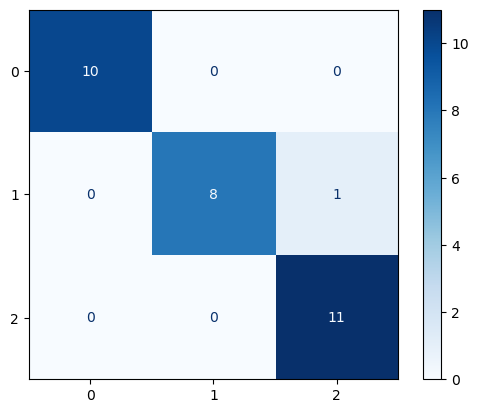

In [48]:
cm_svm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.arange(10))
disp_svm.plot(cmap='Blues')  # Color map can be adjusted
plt.title("SVM Confusion Matrix")
plt.show()

In [49]:
from sklearn.metrics import classification_report

# SVM classification report
print("SVM Classification Report:")
print(classification_report(Y_test, Y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



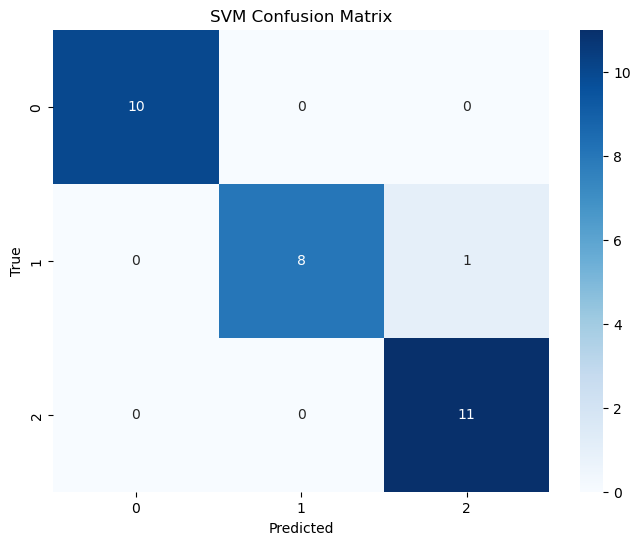

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3), yticklabels=np.arange(3))
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## RF Model code

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [29]:
Y_pred_RF=rf_model.predict(X_test)

In [30]:
print("Accuracy of RF model: ", accuracy_score(Y_test, Y_pred_RF))

Accuracy of RF model:  1.0


## xGBoost Code


In [36]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Specify the parameters for the model
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 10,               # There are 10 classes (digits 0-9)
    'max_depth': 6,                # Depth of trees
    'learning_rate': 0.1,          # Step size
    'eval_metric': 'merror'        # Evaluation metric: classification error
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
xgb_predictions = xgb_model.predict(dtest)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_predictions))

XGBoost Accuracy: 1.0
